In [0]:
import tensorflow as tf
import numpy as np
import sklearn
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import random
import matplotlib.cm as cm
import math

### Question 1 & 2

In [39]:

"""
Heere we define network parametes and build the computational graph
"""

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

##network params
learning_rate = tf.constant(0.0003)
numEpochs = 400
batchSize = 50
displayStep = 5
nodesInEachHiddenLayer = [1024,1024,1024,1024,1024]  #list of nodes  excpet x and y

numExamples,xDim = mnist.train.images.shape
numExamples,yDim = mnist.train.labels.shape


totalNodes = nodesInEachHiddenLayer
X = tf.placeholder(tf.float32,[None,xDim],name = "X")
Y  =  tf.placeholder(tf.float32,[None,yDim], name = "Y")



## collecting weights in a dictionary



def defineWeightsAndBias(nodesInEachHiddenLayer,xDim, yDim):
  
  ## he inisitialisation
  initialiser = tf.contrib.layers.variance_scaling_initializer()
  
  weights = [tf.Variable(initialiser([j,k],dtype=tf.float32)) \
             for (j,k) in zip([xDim]+nodesInEachHiddenLayer,nodesInEachHiddenLayer+[yDim])]
  
  
  biases = [tf.Variable(initialiser([j],dtype=tf.float32))
           for j in nodesInEachHiddenLayer+[yDim]]

#   weights = {'w'+str(i+1): tf.Variable(tf.random_normal([j,k],dtype=tf.float32)) \
#              for (i,(j,k)) in enumerate(zip([xDim]+nodesInEachHiddenLayer,nodesInEachHiddenLayer+[yDim]))}

#   biases = {'b'+str(i+1): tf.Variable(tf.random_normal([j],dtype=tf.float32))
#            for i,j in enumerate(nodesInEachHiddenLayer+[yDim])}

  return weights, biases



def getNetworkOutput(xInp,weights,biases):
  
    totalLayers = nodesInEachHiddenLayer+[yDim]
    layerOutputList = [0 for i in  range(len(totalLayers))]
    
    lastLayerPosition = len(totalLayers)-1
    
    for layerPosition,(weight,bias) in enumerate(zip(weights,biases)):

      if layerPosition == 0:
      
        layerOutputList[layerPosition] = tf.nn.relu(tf.add(tf.matmul(xInp, weight), bias))
         


      elif layerPosition <= lastLayerPosition-1:
      
        layerOutputList[layerPosition] = tf.nn.relu(tf.add(tf.matmul(layerOutputList[layerPosition-1], weight), bias))
        
      
      else:
        
        layerOutputList[layerPosition] = tf.add(tf.matmul(layerOutputList[layerPosition-1], weight), bias)
#         layerOut = tf.nn.relu(layerOut,name='activation_relu')
      
    
    return layerOutputList[-1],layerOutputList
  




Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
##call by functions

weights,biases = defineWeightsAndBias(nodesInEachHiddenLayer,xDim, yDim)
layer_Output, AllLayerOutputs = getNetworkOutput(X,weights,biases)

In [0]:
##loss calculations


lossCalcu  = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=layer_Output, labels=Y))

gradOptimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train = gradOptimizer.minimize(lossCalcu)

## required Layers tensors
predictions = tf.nn.softmax(AllLayerOutputs[-1])

correct_pred = tf.equal(tf.argmax(layer_Output, 1), tf.argmax(Y, 1))

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
initialise = tf.global_variables_initializer()

In [42]:
with tf.Session() as currSess:


    
    
    x_train = mnist.train.images

    y_train = mnist.train.labels

    ##training 
    currSess.run(initialise)
    
    x_test = mnist.test.images
    y_test = mnist.test.labels
    
    for epoch in range(200):
      for iteration in range(mnist.train.num_examples // batchSize):
        xBatch, yBatch = mnist.train.next_batch(batchSize)  
      

        currSess.run(train,feed_dict ={X:xBatch,Y:yBatch})
        
        
      loss, acc = currSess.run([lossCalcu, accuracy], feed_dict={X: x_train, Y: y_train})  

     
      print("Step " + str(epoch) + ", Loss= " + str(loss) + ", Training Accuracy= " + str(acc))


      testAccuracy = currSess.run(accuracy, feed_dict={X: x_test,
                                    Y:y_test })
      print("Testing Accuracy:",testAccuracy)
    ###printing the images for q3
      
      if testAccuracy >= 0.98:
        break
    ##test images accuracy
    
    
    
    random.seed(42)
    indices = random.sample(range(x_test.shape[0]),1000)
    
    
    lastLayerOutput = currSess.run(predictions,feed_dict={X: x_test[indices,:], Y: y_test[indices,:]})
    lasButOneLayer = currSess.run(AllLayerOutputs[-2],feed_dict={X: x_test[indices,:], Y: y_test[indices,:]})
    firstHiddenLayerOutput = currSess.run(AllLayerOutputs[0],feed_dict = {X: x_test[indices,:], Y: y_test[indices,:]})
    secondHiddenLayerOutput = currSess.run(AllLayerOutputs[1],feed_dict = {X: x_test[indices,:], Y: y_test[indices,:]})
    thirdHiddenLayerOutput = currSess.run(AllLayerOutputs[2],feed_dict = {X: x_test[indices,:], Y: y_test[indices,:]})
    fourthHiddenLayerOutput = currSess.run(AllLayerOutputs[3],feed_dict = {X: x_test[indices,:], Y: y_test[indices,:]})
    fifthHiddenLayerOutput = currSess.run(AllLayerOutputs[4],feed_dict = {X: x_test[indices,:], Y: y_test[indices,:]})

Step 0, Loss= 0.084800035, Training Accuracy= 0.9739091
Testing Accuracy: 0.9655
Step 1, Loss= 0.049475204, Training Accuracy= 0.9845091
Testing Accuracy: 0.9718
Step 2, Loss= 0.0537348, Training Accuracy= 0.9828182
Testing Accuracy: 0.9687
Step 3, Loss= 0.024602655, Training Accuracy= 0.99252725
Testing Accuracy: 0.9759
Step 4, Loss= 0.02885278, Training Accuracy= 0.9912364
Testing Accuracy: 0.9757
Step 5, Loss= 0.020605596, Training Accuracy= 0.99347275
Testing Accuracy: 0.9802


### Question 3

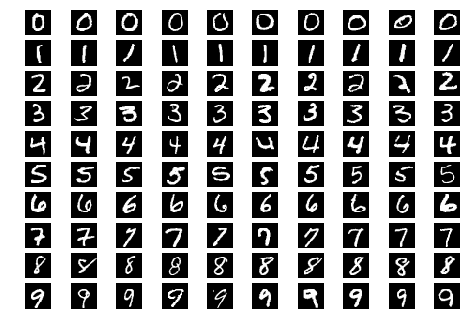

In [43]:
"""
Plotting of the coresponding actual images when the predications are 0,1,2....
"""
def plotImages(numImages,xArray,predictionArray):
  fig, axes = plt.subplots(10, 10)
  
  for i in range(10):
    
    indices = np.where(predictionArray.argmax(axis = 1)==i)[0]
    
    for j in range(10):
      index = indices[j]
      
      pixels = xArray[index,:]
      pixels = pixels.reshape((28, 28))
      axes[i, j].imshow(pixels, cmap='gray')
      axes[i,j].axis('off')

plotImages(100,x_test[indices,:],lastLayerOutput)


### Question 4

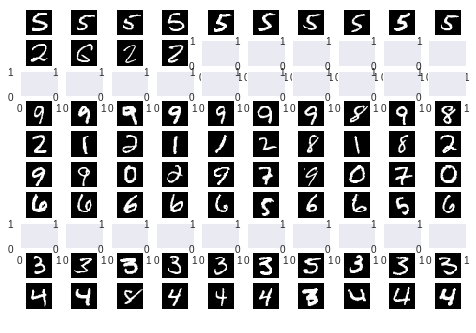

In [45]:
"""
Randomly choosing 10 dimensions and assuming the dimensions in order representing the probability of 0,1,....
and ploting the corresponding actual images
"""

def plotImages(numImages,xArray,predictionArray):
  fig, axes = plt.subplots(10, 10)
  random.seed(21)
  randomDimensions = random.sample(range(predictionArray.shape[1]),10)
  for i in range(10):
    
    indices = np.where(predictionArray[:,randomDimensions].argmax(axis = 1)==i)[0]
#     print(indices[:10])
    for position,index in enumerate(indices[:10]):
      
      
      pixels = xArray[index,:]
      pixels = pixels.reshape((28, 28))
      axes[i, position].imshow(pixels, cmap='gray')
      axes[i,position].axis('off')
    plt.axis('off')
plotImages(100,x_test[indices,:],lasButOneLayer)

As compared to 1.3 the dimensins are randomly sampled and their max probability in say 1st dimension may not even correspond to prediction of being it 1, hence the corrresponding image may not be 1. And there may be case  where out of all 1000 samples do not at all predict a certian digit as we assumed hence the empty rows in the image matrix

Above you can observe that certain neurons are fired (max probability) for certain pattern of examples, since this is from last but one layer, the pattern to which neurons fire is more refined. An ideal case is in a row there should be all similar looking digits (pattern of strokes).

Compared to the last plot of the softmax layer, this is not the whole picture, since the combinations of these firings go into the last softmax layer. Hence this layer is able to detect a few patterns well and combinations of this patterns with the corresponding weights makes the next layer's neurons fire correctly.

Basically the layer has learned a template that gets activated at certain inputs (similar pattern digits )



### Question 5 and 6

In [0]:

def PCAPlot(X,Y, layerNumForTitle):
#   X_reduced = sklearn.decomposition.PCA(n_components= 2).fit_transform(X)
  PCAFitObj = sklearn.decomposition.PCA(n_components= 2).fit(X)
  X_reduced = PCAFitObj.transform(X)
  Y_reduced = Y.argmax(axis = 1)
  
  ### for colors
  cmap = plt.cm.jet
  cmaplist = [cmap(i) for i in range(cmap.N)]

  cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
  
  ##
#   plt.scatter(X_reduced[:,0],X_reduced[:,1], c=Y_reduced, cmap = cmap)
  plt.scatter(X_reduced[:,0],X_reduced[:,1], c=Y_reduced, cmap = plt.get_cmap('tab10',10))
  plt.title("PCA Plot for  "+str(layerNumForTitle))
  means = pd.DataFrame({'X1':X_reduced[:,0],'X2':X_reduced[:,1],'Y':Y_reduced}).groupby('Y').mean().reset_index('Y')
  for index, row in means.iterrows():
    plt.annotate(int(row['Y']),(row['X1'],row['X2']),size=20, weight='bold',color = cmaplist[index])
  print("Total Variance explained is in %: ",sum(PCAFitObj.explained_variance_ratio_)*100 )

  


def tSNEPlot(X,Y,layerNumForTitle):
  X_reduced = TSNE(n_components=2).fit_transform(X)
  Y_reduced = Y.argmax(axis = 1)
  
  ### for colors
  cmap = plt.cm.jet
  cmaplist = [cmap(i) for i in range(cmap.N)]

  cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
  
  ##
  plt.scatter(X_reduced[:,0],X_reduced[:,1], c=Y_reduced, cmap = plt.get_cmap('tab10',10))
  plt.title("tSNE Plot for  "+ str(layerNumForTitle))
  means = pd.DataFrame({'X1':X_reduced[:,0],'X2':X_reduced[:,1],'Y':Y_reduced}).groupby('Y').mean().reset_index('Y')
  for index, row in means.iterrows():
    plt.annotate(int(row['Y']),(row['X1'],row['X2']), size=20, weight='bold',color = cmaplist[index])

Total Variance explained is in %:  17.825349420309067


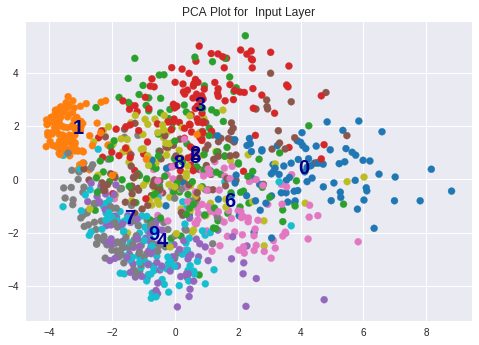

In [54]:
x = mnist.test.images

y = mnist.test.labels
PCAPlot(x[indices,:],y_test[indices,:], "Input Layer" )

The images are not distinguishable easily.
Since PCA establishes eigen vecotrs along which the variance of samples is highest we can observe that the PCA on the initial input vecors is able to variate (seperate) 1 almost correctly as it is 1 is dissimilar in writing to any other digit except 7 which is a little closer to 1.
While 3,8,6 are close since their strokes in handwriting are very close.
0 variates the maximum with 1 as they are very dissimilar.
7,9,4 have similarity that the head of the digits has almost the same stroke.


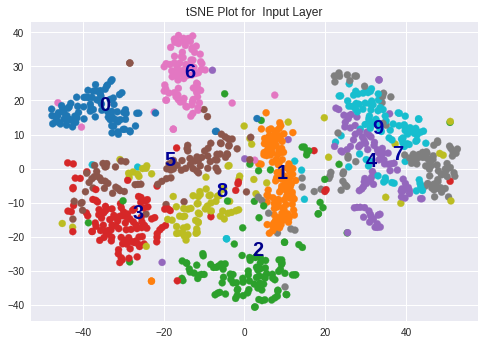

In [24]:
tSNEPlot(x[indices,:],y_test[indices,:], "Input Layer" )

The tSNE attempts to cluster points based on their distance similarity. Since the pixel pattern for similar looking digits is almost the same since they are handwriting strokes and cannot be very discontinous , tSNE approach of clustering based on the distance similarity works well here.
The aim of tSNE is cluster neighbouring points (similar digits) intra cluster distance is minimised, however it doesnt aim to increase inter cluster distance (like KMeans). Hence similar looking digits tend to stay close by in the clusters.

## Question 7

Total Variance explained is in %:  14.45733830332756


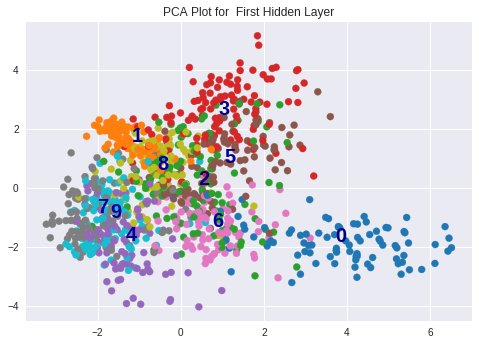

In [55]:
PCAPlot(firstHiddenLayerOutput,y_test[indices,:] ,"First Hidden Layer")

The Variance explained in the PCA Plot above is just 14% which means that all of the varaince is not captured by just two eigen vectors. Hence the PCA plot cannot distinguish the digits distinctively.

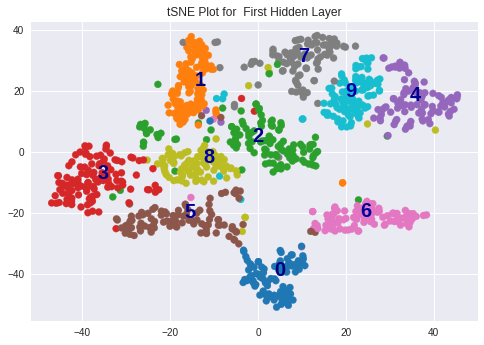

In [61]:
tSNEPlot(firstHiddenLayerOutput,y_test[indices,:],"First Hidden Layer")

The similiraties are brought together due to the layers , because certain set of neurons get activated for a certain digit , the tSNE gets to associate similar digits more closely and hence the dissimilarity between two different digits also grows in terms of their dimensional representation.

## Question 8
#### second hidden layer




Total Variance explained is in %:  17.78285652399063


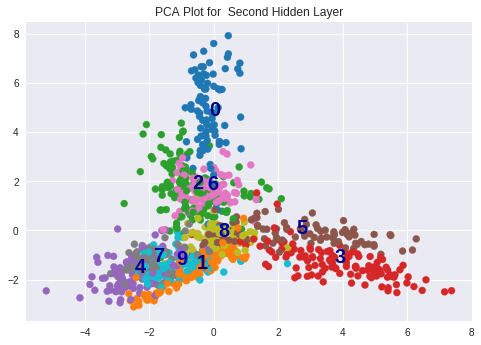

In [56]:
PCAPlot(secondHiddenLayerOutput,y_test[indices,:],"Second Hidden Layer")

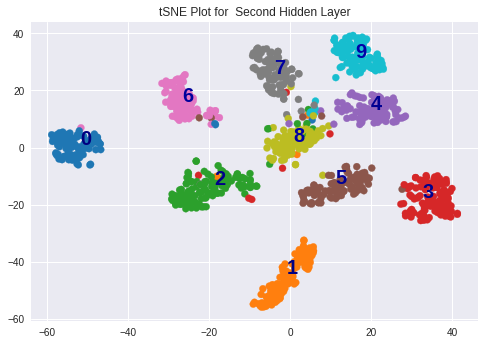

In [0]:
tSNEPlot(secondHiddenLayerOutput,y_test[indices,:],"Second Hidden Layer")

As further down the neural network, the neurons response to certain digit distincively  increases. Hence the sparsity of the 1024 dimensions as well. Hence tSNE is able to capture the asssociation and disaccosiation more clearly

### third layer

Total Variance explained is in %:  25.39350539445877


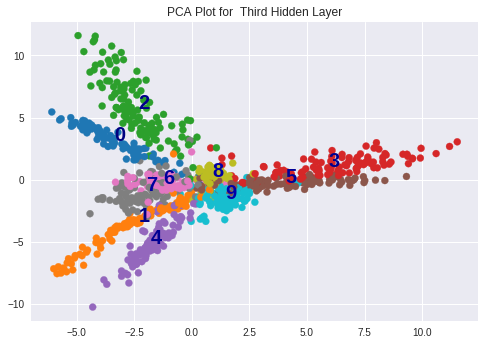

In [57]:
PCAPlot(thirdHiddenLayerOutput,y_test[indices,:] ,"Third Hidden Layer")

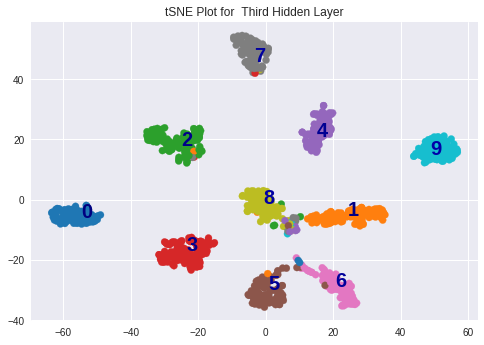

In [0]:
tSNEPlot(thirdHiddenLayerOutput,y_test[indices,:],"Third Hidden Layer")

### Fourth Hidden Layer

Total Variance explained is in %:  31.11303001642227


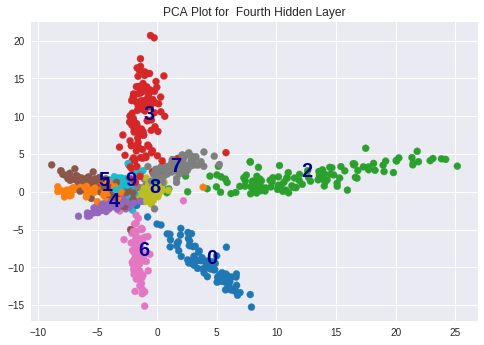

In [58]:
PCAPlot(fourthHiddenLayerOutput,y_test[indices,:] ,"Fourth Hidden Layer")

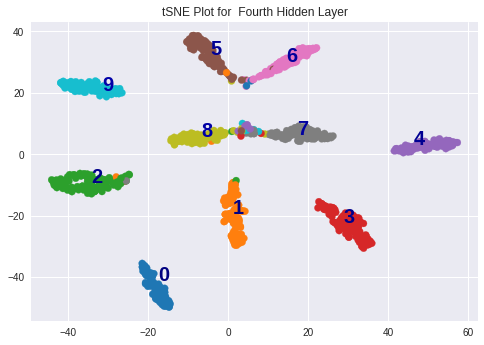

In [0]:
tSNEPlot(fourthHiddenLayerOutput,y_test[indices,:],"Fourth Hidden Layer")

### Fifth Layer

Total Variance explained is in %:  36.080148816108704


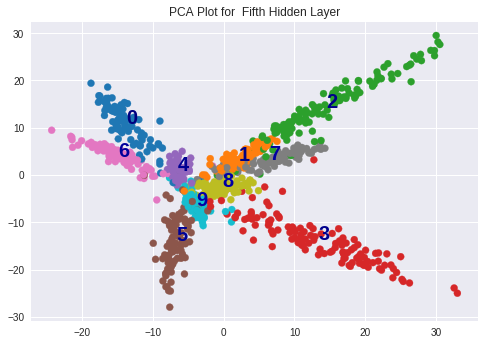

In [59]:
PCAPlot(fifthHiddenLayerOutput,y_test[indices,:],"Fifth Hidden Layer")

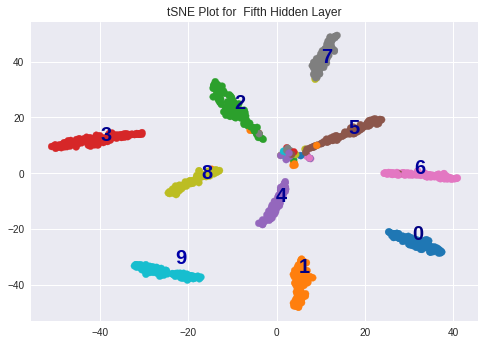

In [0]:
tSNEPlot(fifthHiddenLayerOutput,y_test[indices,:],"Fifth Hidden Layer")

### Last Layer

Total Variance explained is in %:  26.329433917999268


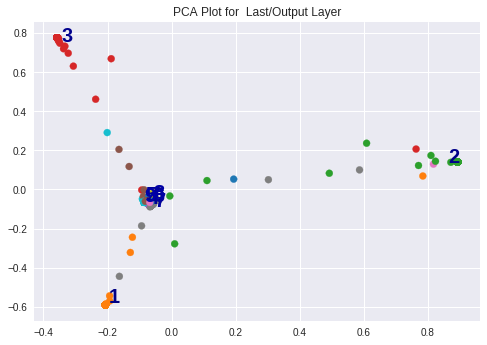

In [69]:
PCAPlot(lastLayerOutput,y_test[indices,:],"Last/Output Layer")

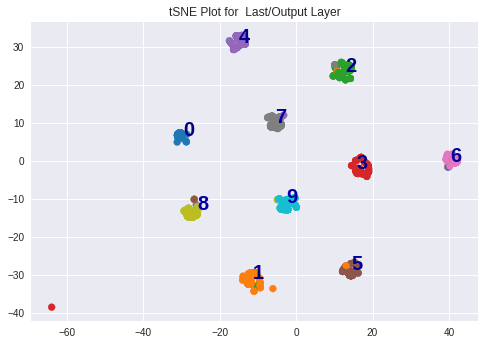

In [0]:
tSNEPlot(lastLayerOutput,y_test[indices,:],"Last/Output Layer")


At the last layer since the dimensions have reduced to 10 and are active distinctively for a certain digit , tSNE can easly associate the distance similarilty between the samples hence is able to cluster them together

It is constantly observed that tSNE performs better than PCA since the problem here is to explain the association of the digits in a certain group rather than the how different are these digits. 

As further down the layer the templates are more finer and hence the dimensionality reduction techniques tend to work bettter.

# Problem 2

In [0]:
from google.colab import files
uploaded = files.upload()


# from google.colab import drive
# drive.mount('/content/gdrive')

# with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
#   f.write('Hello Google Drive!')
#   !cat /content/gdrive/My\ Drive/foo.txt



In [0]:
##to get drive files

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 113597 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
###mount drive

!mkdir -p drive
!google-drive-ocamlfuse drive

Have used HE initialisation and AdamOptimizer

In [0]:
###load files
# !pip install librosa # in colab, you'll need to install this
import librosa
import io


"""
Change directory path here and leave it blank if its in the same directory as the 
Notebook
"""
# dirpath  = "./drive/DeepLearning Assign1/"
dirpath  = ""


### Loading the files

##Y path  = 
sn_train_y, sr=librosa.load(dirpath+'train_clean_male.wav', sr=None)
S_Train=librosa.stft(sn_train_y, n_fft=1024, hop_length=512)

##X
sn_train_x, sr=librosa.load(dirpath+'train_dirty_male.wav', sr=None)
X_Train=librosa.stft(sn_train_x, n_fft=1024, hop_length=512)

##XTest1
sn_test1, sr=librosa.load(dirpath+'test_x_01.wav', sr=None)
X1_test =librosa.stft(sn_test1, n_fft=1024, hop_length=512)


##XTest2
sn_test2, sr=librosa.load(dirpath+'test_x_02.wav', sr=None)
X2_test =librosa.stft(sn_test2, n_fft=1024, hop_length=512)

X1_test = np.transpose(X1_test)
X1_Test_Mag = np.abs(X1_test)

X2_test = np.transpose(X2_test)
X2_Test_Mag = np.abs(X2_test)

S_Mag = np.transpose(np.abs(S_Train))
X_Mag = np.transpose(np.abs(X_Train))

# print(X1_test.shape)

In [0]:


##network params
learning_rate = tf.constant(0.0003)
numEpochs = 400
batchSize = 100
displayStep = 100
nodesInEachHiddenLayer = [1024,1024]  #list of nodes  excpet x and y

(numExamples,xDim) = X_Mag.shape
(numExamples,yDim) = S_Mag.shape


X = tf.placeholder(tf.float32,[None,xDim],name = "X")
Y  =  tf.placeholder(tf.float32,[None,yDim], name = "Y")



## collecting weights in a dictionary




def defineWeightsAndBias(nodesInEachHiddenLayer,xDim, yDim):
  
  ## he initialiisation
  initialiser = tf.contrib.layers.variance_scaling_initializer()
  
  weights = [tf.Variable(initialiser([j,k],dtype=tf.float32)) \
             for (j,k) in zip([xDim]+nodesInEachHiddenLayer,nodesInEachHiddenLayer+[yDim])]
  
  
  biases = [tf.Variable(initialiser([j],dtype=tf.float32))
           for j in nodesInEachHiddenLayer+[yDim]]

  return weights, biases


def getNetworkOutput(xInp,weights,biases):
  
    totalLayers = nodesInEachHiddenLayer+[yDim]
    layerOutputList = [0 for i in  range(len(totalLayers))]
    
    lastLayerPosition = len(totalLayers)-1
    
    for layerPosition,(weight,bias) in enumerate(zip(weights,biases)):
      
#       tf.print(layerPosition)
      if layerPosition == 0:
      
        layerOutputList[layerPosition] = tf.nn.relu(tf.add(tf.matmul(xInp, weight), bias))
         


      elif layerPosition <= lastLayerPosition-1:
      
        layerOutputList[layerPosition] = tf.nn.relu(tf.add(tf.matmul(layerOutputList[layerPosition-1], weight), bias))
        
      
      else:
        
        layerOutputList[layerPosition] = tf.nn.relu(tf.add(tf.matmul(layerOutputList[layerPosition-1], weight), bias))
        
      
    
    return layerOutputList[-1],layerOutputList



## accuracy metirc 
def RSquared(yAct, yPred):

    residual = tf.reduce_sum(tf.square(tf.subtract(yAct, yPred)))
    total = tf.reduce_sum(tf.square(tf.subtract(yAct, tf.reduce_mean(yAct))))
    r2 = tf.subtract(1.0, tf.math.divide(residual, total))
    return r2
  
  
## convert out put to time domian
def getOutputSound(xRawInp,xMag, YPred):
    S_Hat = np.multiply(xRawInp/xMag,YPred)
    S_Hat = librosa.istft(S_Hat.T, hop_length=512)

        
    return S_Hat
  
## signal ton noise ration
def getSNR(yRawInpTimeDomain,yPredReadyToWrite):
    minLength = min(len(yRawInpTimeDomain),len(yPredReadyToWrite))
    clippedY_True = yRawInpTimeDomain[:minLength]
    clippedY_Pred = yPredReadyToWrite[:minLength]
    signal  = np.dot(clippedY_True,clippedY_True.T)
    subtract = clippedY_True - clippedY_Pred
    noise = np.dot(subtract,subtract.T)
    
    return 10*math.log10(signal/noise)

In [0]:
## required training
weights,biases = defineWeightsAndBias(nodesInEachHiddenLayer,xDim, yDim)
layer_Output, AllLayerOutputs = getNetworkOutput(X,weights,biases)
# layer_Output, AllLayerOutputs = getNetworkOutput(X,nodesInEachHiddenLayer,yDim)
lossCalcu  = tf.losses.mean_squared_error(labels = Y ,predictions = layer_Output)

gradOptimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

train = gradOptimizer.minimize(lossCalcu)
accuracy = RSquared(layer_Output,Y)

initialise = tf.global_variables_initializer()

In [19]:
### training and running the sessions

with tf.Session() as currSess:


    x_train = X_Mag
    

    y_train = S_Mag
    
    
    
    
    ##training 
    currSess.run(initialise)
    
    
    for epoch in range(50):
      for index, offset in enumerate(range(0, len(x_train), batchSize)):
        
        xBatch, yBatch = x_train[offset: offset + batchSize], y_train[offset: offset + batchSize]

          
        currSess.run(train,feed_dict ={X:xBatch,Y:yBatch})
        
      loss = currSess.run([lossCalcu], feed_dict={X: x_train, Y: y_train})  
      accu = currSess.run([accuracy], feed_dict={X: x_train, Y: y_train})  
    
      print("Step " + str(epoch) + ", Loss= " + str(loss) + " Accuracy = "+ str(accu))
      
    ###predictions for test sets
    x_test_Mag = X1_Test_Mag
    testPreds1 = currSess.run([layer_Output], feed_dict={X: x_test_Mag})  
    s_Hat1 = getOutputSound(X1_test,x_test_Mag,testPreds1)
    
    
    x_test_Mag = X2_Test_Mag
    testPreds2 = currSess.run([layer_Output], feed_dict={X: x_test_Mag})  
    s_Hat2 = getOutputSound(X2_test,x_test_Mag,testPreds2)
    
    
    trainPreds = currSess.run([layer_Output], feed_dict={X: X_Mag})  
    s_Hat_Train = getOutputSound(X_Train.T,X_Mag,trainPreds)
    
    
    
    
    


Step 0, Loss= [0.039676365] Accuracy = [0.20419085]
Step 1, Loss= [0.023947256] Accuracy = [0.65773714]
Step 2, Loss= [0.017912026] Accuracy = [0.77348375]
Step 3, Loss= [0.015215191] Accuracy = [0.8118632]
Step 4, Loss= [0.013717054] Accuracy = [0.83264375]
Step 5, Loss= [0.012725616] Accuracy = [0.84822446]
Step 6, Loss= [0.012111151] Accuracy = [0.85863054]
Step 7, Loss= [0.011698541] Accuracy = [0.86072135]
Step 8, Loss= [0.011145075] Accuracy = [0.86802113]
Step 9, Loss= [0.011137572] Accuracy = [0.87228894]
Step 10, Loss= [0.010573655] Accuracy = [0.87682194]
Step 11, Loss= [0.010543753] Accuracy = [0.8723952]
Step 12, Loss= [0.010284916] Accuracy = [0.883008]
Step 13, Loss= [0.009712076] Accuracy = [0.8926669]
Step 14, Loss= [0.009812167] Accuracy = [0.883835]
Step 15, Loss= [0.009492575] Accuracy = [0.8890846]
Step 16, Loss= [0.009221208] Accuracy = [0.8976865]
Step 17, Loss= [0.009305921] Accuracy = [0.89886016]
Step 18, Loss= [0.009162138] Accuracy = [0.8935573]
Step 19, Loss

In [0]:
### write to required files

librosa.output.write_wav('test_s_01_recons.wav', s_Hat1, sr = 16000)
librosa.output.write_wav('test_s_02_recons.wav', s_Hat2, sr = 16000)
librosa.output.write_wav('train_cleaned.wav', s_Hat_Train, sr = 16000)


In [20]:
getSNR(sn_train_y,s_Hat_Train)

12.986909890779279